In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from matplotlib import font_manager
from sklearn.linear_model import Ridge
from prettytable import PrettyTable

### a. Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + N 

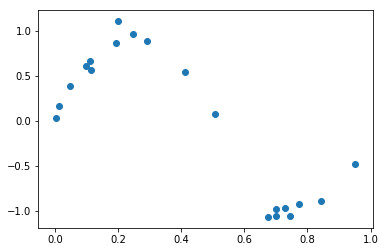

In [2]:
np.random.seed(666)
x = np.random.uniform(0, 1, size=20)
X = x.reshape(-1, 1)
y = np.sin(2*math.pi*x) + np.random.normal(0, 0.1, 20)
plt.scatter(x,y)
plt.show()

#Use 10 for train and 10 for test 

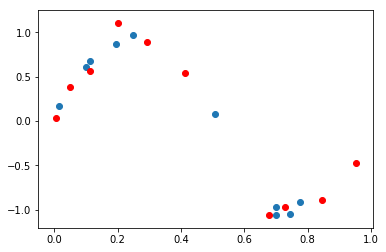

In [3]:
train_x,test_x, train_y, test_y =model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, c = 'red')
plt.show()

### b. Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

1. order = 0

In [4]:
coef1 = [" "]*10
train_x = np.array(train_x).reshape(len(train_x), 1)
train_y = np.array(train_y).reshape(len(train_y), 1)

features = PolynomialFeatures(degree=0)
poly_x = features.fit_transform(train_x) 
 
model1 = LinearRegression()
model1.fit(poly_x,train_y)
coef1[0]=model1.coef_[0][0]
print(coef1)

[0.0, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


2. order = 1

In [5]:
coef2 = [" "]*10
features = PolynomialFeatures(degree=1)
poly_x = features.fit_transform(train_x)   
model2 = LinearRegression()
model2.fit(poly_x,train_y)
coef2[0] = round(model2.coef_[0][0],2)
coef2[1] = round(model2.coef_[0][1],2)
print(coef2)

[0.0, -2.47, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


3. order = 3

In [6]:
coef3 = [" "]*10
features = PolynomialFeatures(degree=3)
poly_x = features.fit_transform(train_x) 
 
model3 = LinearRegression()
model3.fit(poly_x,train_y)
coef3[0] = model3.coef_[0][0]
coef3[1] = round(model3.coef_[0][1],2)
coef3[2] = round(model3.coef_[0][2],2)
print(coef3)

[0.0, 9.7, -28.44, ' ', ' ', ' ', ' ', ' ', ' ', ' ']


4. order = 9

In [7]:
features = PolynomialFeatures(degree=9)
poly_x = features.fit_transform(train_x) 
coef4 = [" "]*10
model4 = LinearRegression()
model4.fit(poly_x,train_y)
for i in range(10):
    coef4[i] = round(model4.coef_[0][i],2)
print(coef4)

[0.0, 955.31, -26786.46, 343278.02, -2370370.39, 9422756.86, -21987283.72, 29590635.28, -21208312.83, 6260791.84]


### c. Display weights in table 

In [8]:
x=PrettyTable()
x.add_column(" ", ["w0", "w1", "w2", "w3", "w4", "w5", "w6", "w7", "w8", "w9"])
x.add_column("order=0", coef1)
x.add_column("order=1", coef2)
x.add_column("order=3", coef3)
x.add_column("order=9", coef4)
print(x)

+----+---------+---------+---------+--------------+
|    | order=0 | order=1 | order=3 |   order=9    |
+----+---------+---------+---------+--------------+
| w0 |   0.0   |   0.0   |   0.0   |     0.0      |
| w1 |         |  -2.47  |   9.7   |    955.31    |
| w2 |         |         |  -28.44 |  -26786.46   |
| w3 |         |         |         |  343278.02   |
| w4 |         |         |         | -2370370.39  |
| w5 |         |         |         |  9422756.86  |
| w6 |         |         |         | -21987283.72 |
| w7 |         |         |         | 29590635.28  |
| w8 |         |         |         | -21208312.83 |
| w9 |         |         |         |  6260791.84  |
+----+---------+---------+---------+--------------+


### d. Draw a chart of fit data

1. order = 0

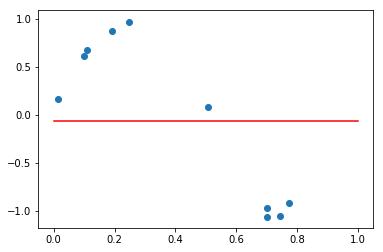

In [9]:
train_x = np.array(train_x).reshape(len(train_x), 1) 
train_y = np.array(train_y).reshape(len(train_y), 1)

features = PolynomialFeatures(degree=0)
poly_x = features.fit_transform(train_x)    
 
model1 = LinearRegression()
model1.fit(poly_x,train_y)

 
# draw a fit graph
x_cur = np.linspace(0, 1, 100)
x_cur = np.array(x_cur).reshape(len(x_cur),1)
poly_x_cur = features.fit_transform(x_cur)
 
plt.scatter(train_x, train_y)
plt.plot(x_cur, model1.predict(poly_x_cur), 'r')

plt.show()

2. order = 1

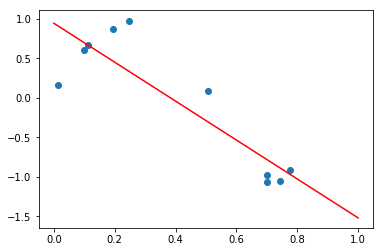

In [10]:
features = PolynomialFeatures(degree=1)
poly_x = features.fit_transform(train_x)    
 
model2 = LinearRegression()
model2.fit(poly_x,train_y)
 
# draw a fit graph
x_cur = np.linspace(0, 1, 100)
x_cur = np.array(x_cur).reshape(len(x_cur),1)
poly_x_cur = features.fit_transform(x_cur)
 
plt.scatter(train_x, train_y)
plt.plot(x_cur, model2.predict(poly_x_cur), 'r')

plt.show()

3. order = 3

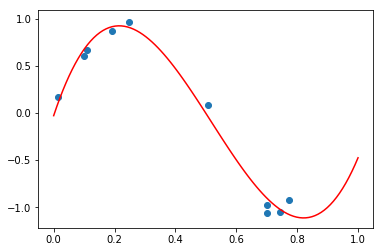

In [11]:
features = PolynomialFeatures(degree=3)
poly_x = features.fit_transform(train_x)    
 
model3 = LinearRegression()
model3.fit(poly_x,train_y)
 
# draw a fit graph
x_cur = np.linspace(0, 1, 100)
x_cur = np.array(x_cur).reshape(len(x_cur),1)
poly_x_cur = features.fit_transform(x_cur)
 
plt.scatter(train_x, train_y)
plt.plot(x_cur, model3.predict(poly_x_cur), 'r')

plt.show()

4. order = 9

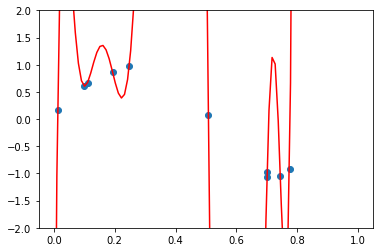

In [12]:
features = PolynomialFeatures(degree=9)
poly_x = features.fit_transform(train_x)    
 
model4 = LinearRegression()
model4.fit(poly_x,train_y)
 
# draw a fit graph
x_cur = np.linspace(0, 1, 100)
x_cur = np.array(x_cur).reshape(len(x_cur),1)
poly_x_cur = features.fit_transform(x_cur)
 
plt.scatter(train_x, train_y)
plt.plot(x_cur, model4.predict(poly_x_cur), 'r')
plt.ylim(-2,2)
plt.show()

e. draw train error and test error

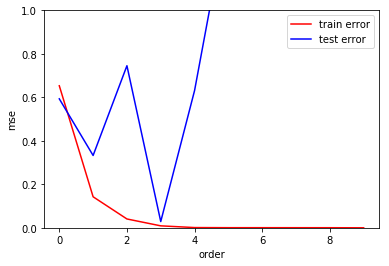

In [13]:
test_mse = []
train_mse = []
def getModel(i:int):
    poly_features = PolynomialFeatures(degree=i)
    poly_x = poly_features.fit_transform(train_x)
    model = LinearRegression()
    model.fit(poly_x,train_y)
    return model

def get_test_mse(i:int, model) :
    polynomial = PolynomialFeatures(degree = i)
    poly_x_test = polynomial.fit_transform(test_x.reshape(len(test_x), 1))
    pre_y_test = model.predict(poly_x_test)
#     return getMse(test_y, pre_y_test)
    return mean_squared_error(test_y, pre_y_test)

def get_train_mse(i:int, model):
    polynomial = PolynomialFeatures(degree = i)
    poly_x_train = polynomial.fit_transform(train_x.reshape(len(test_x), 1))
    pre_y_train = model.predict(poly_x_train)
#     return getMse(train_y, pre_y_train)
    return mean_squared_error(train_y, pre_y_train)

for i in range(0,10):
    test_mse.append(get_test_mse(i, getModel(i)))
    train_mse.append(get_train_mse(i, getModel(i)))
x=[0,1,2,3,4,5,6,7,8,9]
plt.plot(x, train_mse, 'r', label="train error")
plt.plot(x, test_mse, 'blue', label="test error")
plt.ylim(0,1)
plt.xlabel('order')
plt.ylabel('mse')
plt.legend()
plt.show()

f. generate 100 more data and fit 9th order model and draw fit

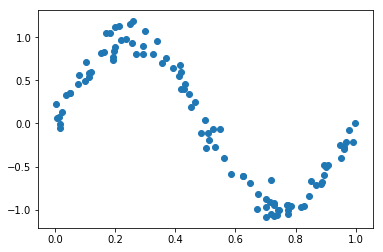

In [14]:
np.random.seed(666)
x_100 = np.random.uniform(0, 1, size=100)
X_100 = x_100.reshape(-1, 1)
y_100 = np.sin(2*math.pi*x_100) + np.random.normal(0, 0.1, 100)
plt.scatter(x_100,y_100)
plt.show()

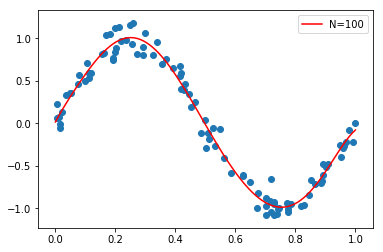

In [15]:
x_100 = np.array(x_100).reshape(len(y_100), 1)
y_100 = np.array(y_100).reshape(len(y_100), 1)

features = PolynomialFeatures(degree=9)
poly_x = features.fit_transform(x_100)
 
model100 = LinearRegression()
model100.fit(poly_x,y_100)
 
# draw a fit graph
x_cur = np.linspace(0, 1, 100)
x_cur = np.array(x_cur).reshape(len(x_cur),1)
poly_x_cur = features.fit_transform(x_cur)
 
# plt.plot(x1, train_mse, 'r', label="train error")
plt.plot(x_cur, model100.predict(poly_x_cur), 'r', label="N=100")
plt.scatter(x_100, y_100)
plt.legend()
plt.show()


g. regularize using the sum of weights. 

h. Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [16]:
np.random.seed(666)
x = np.random.uniform(0, 1, size=20)
X = x.reshape(-1, 1)
y = np.sin(2*math.pi*x) + np.random.normal(0, 0.1, 20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
def plot_model(model):
    X_plot = np.linspace(0, 1, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
 
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.ylim(-2,2)
    plt.xlim(0,1)

1. lambda=1

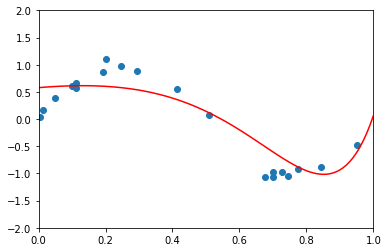

In [18]:
ridge_test_mse = []
ridge_train_mse = []
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
 

ridge1_model = RidgeRegression(degree=9, alpha=1)
ridge1_model.fit(X_train, y_train)
ridge1_predict = ridge1_model.predict(X_test)
ridge1_predict_train = ridge1_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge1_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge1_predict_train))
# mean_squared_error(y_test ,ridge1_predict)

plot_model(ridge1_model)
# print(ridge_test_mse)
# print(ridge_train_mse)

2. lambda=0.1

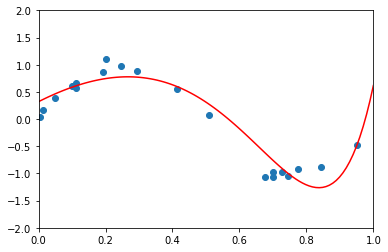

In [19]:
ridge2_model = RidgeRegression(degree=9, alpha=0.1)
ridge2_model.fit(X_train, y_train)
ridge2_predict = ridge2_model.predict(X_test)
ridge2_predict_train = ridge2_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge2_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge2_predict_train))
# mean_squared_error(y_test ,ridge2_predict)

plot_model(ridge2_model)

3. lambda=0.01

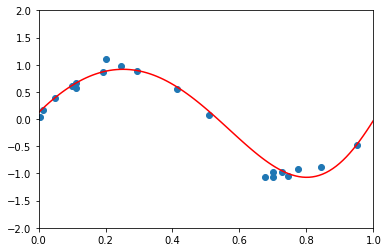

In [20]:
ridge3_model = RidgeRegression(degree=9, alpha=0.01)
ridge3_model.fit(X_train, y_train)
ridge3_predict = ridge3_model.predict(X_test)
mean_squared_error(y_test ,ridge3_predict)
ridge3_predict_train = ridge3_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge3_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge3_predict_train))

plot_model(ridge3_model)

4. lambda=0.001

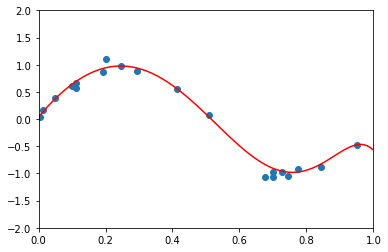

In [21]:
ridge4_model = RidgeRegression(degree=9, alpha=0.001)
ridge4_model.fit(X_train, y_train)
ridge4_predict = ridge4_model.predict(X_test)
mean_squared_error(y_test ,ridge4_predict)
ridge4_predict_train = ridge4_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge4_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge4_predict_train))

plot_model(ridge4_model)

5. lambda=0.0001

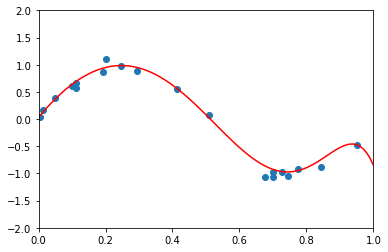

In [22]:
ridge5_model = RidgeRegression(degree=9, alpha=0.0001)
ridge5_model.fit(X_train, y_train)
ridge5_predict = ridge5_model.predict(X_test)
mean_squared_error(y_test ,ridge5_predict)
ridge5_predict_train = ridge5_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge5_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge5_predict_train))

plot_model(ridge5_model)

6. lambda=0.00001

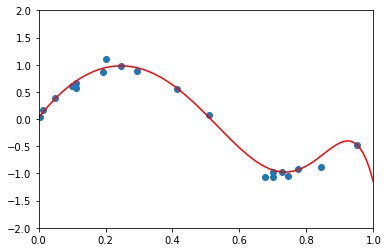

In [23]:
ridge6_model = RidgeRegression(degree=9, alpha=0.00001)
ridge6_model.fit(X_train, y_train)
ridge6_predict = ridge6_model.predict(X_test)
mean_squared_error(y_test ,ridge6_predict)
ridge6_predict_train = ridge6_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge6_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge6_predict_train))

plot_model(ridge6_model)

7. lambda=0

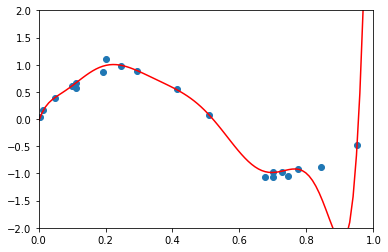

In [24]:
ridge7_model = RidgeRegression(degree=9, alpha=0)
ridge7_model.fit(X_train, y_train)
ridge7_predict = ridge7_model.predict(X_test)
mean_squared_error(y_test ,ridge7_predict)
ridge7_predict_train = ridge7_model.predict(X_train)
ridge_test_mse.append(mean_squared_error(y_test ,ridge7_predict))
ridge_train_mse.append(mean_squared_error(y_train ,ridge7_predict_train))

plot_model(ridge7_model)

i. draw test and train error according to lamda

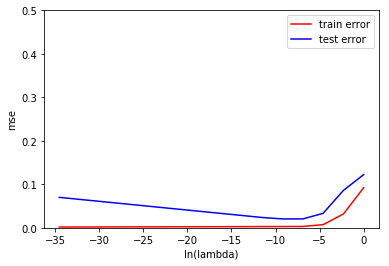

In [25]:
x=[math.log(1), math.log(0.1), math.log(0.01), math.log(0.001), math.log(0.0001), math.log(0.00001), math.log(0.000000000000001)]
plt.plot(x, ridge_train_mse, 'r', label="train error")
plt.plot(x, ridge_test_mse, 'blue', label="test error")
plt.ylim(0,0.5)
plt.xlabel('ln(lambda)')
plt.ylabel('mse')
plt.legend()
plt.show()

So best lambda is ln(lambda)=-7